### K. Bharath, 2211CS010298, Group 4

## Dataset Description

The `govt.xlsx` dataset contains detailed demographic, behavioral, and financial data of individuals across different regions. It includes information such as age, gender, location, profession, income, and platform usage, along with indicators like home and car ownership. Users’ interests and time spent on platforms (e.g., Instagram, Facebook) provide insights into engagement and preferences. This data is valuable for government policy-making, targeted marketing, and financial analysis. It enables personalized outreach, risk assessment, and social media analytics. With careful handling of missing values and outliers, this dataset can be leveraged for predictive modeling and trend analysis.

### Key Information about "govt.xlsx"

Demographics: Age, gender, location, and type of residential area (urban/suburban).

Platform Usage: Time spent on platforms like Instagram and Facebook.

Interests & Profession: User preferences (e.g., Sports, Travel) and professional status.

Financial Details: Annual income, debt status, homeownership, and car ownership

## Loading the Data

In [2]:
import pandas as pd
df = pd.read_excel("govt.xlsx")
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56.0,male,3.0,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774.0,1.0,0.0,0.0
1,46.0,female,NaN,Facebook,Travel,United Kingdom,Urban,NaN,10564.0,1.0,1.0,1.0
2,32.0,male,8.0,Instagram,Sports,Australia,Sub_Urban,NaN,13258.0,0.0,0.0,0.0
3,60.0,non-binary,5.0,Instagram,Travel,United Kingdom,Urban,Student,12500.0,0.0,1.0,NaN
4,25.0,male,NaN,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22.0,NaN,8.0,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536.0,0.0,NaN,0.0
996,40.0,non-binary,6.0,YouTube,Travel,NaN,Rural,Software Engineer,12711.0,1.0,0.0,0.0
997,27.0,non-binary,5.0,YouTube,Travel,United Kingdom,Rural,Student,17595.0,1.0,0.0,1.0
998,61.0,female,4.0,NaN,Sports,Australia,Sub_Urban,Marketer Manager,16273.0,1.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           948 non-null    float64
 1   gender        955 non-null    object 
 2   time_spent    942 non-null    float64
 3   platform      940 non-null    object 
 4   interests     956 non-null    object 
 5   location      951 non-null    object 
 6   demographics  952 non-null    object 
 7   profession    951 non-null    object 
 8   income        958 non-null    float64
 9   indebt        950 non-null    float64
 10  isHomeOwner   953 non-null    float64
 11  Owns_Car      944 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


In [4]:
df.value_counts()

age   gender      time_spent  platform   interests  location        demographics  profession         income   indebt  isHomeOwner  Owns_Car
18.0  female      2.0         YouTube    Travel     United Kingdom  Sub_Urban     Software Engineer  19344.0  1.0     1.0          0.0         1
49.0  female      7.0         Instagram  Sports     United Kingdom  Rural         Software Engineer  16720.0  1.0     0.0          1.0         1
50.0  female      7.0         Instagram  Lifestlye  United Kingdom  Sub_Urban     Marketer Manager   14378.0  0.0     1.0          0.0         1
                  6.0         Instagram  Lifestlye  Australia       Urban         Student            13895.0  1.0     0.0          0.0         1
                  4.0         Instagram  Travel     United Kingdom  Sub_Urban     Marketer Manager   17151.0  0.0     0.0          1.0         1
                                                                                                                                       

# Cleaning the data

In [5]:
df['time_spent'] = df['time_spent'].fillna(df['time_spent'].median())


df["profession"] = df["profession"].fillna(df.groupby("demographics")["profession"].transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown"))

df['interests'] = df['interests'].replace({'Lifestlye': 'Lifestyle'})

df['demographics'] = df['demographics'].replace({'Sub_Urban': 'Suburban'})


binary_cols = ['indebt', 'isHomeOwner', 'Owns_Car']
df[binary_cols] = df[binary_cols].fillna(0).astype(int)

df.drop_duplicates(inplace=True)


df


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56.0,male,3.0,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774.0,1,0,0
1,46.0,female,5.0,Facebook,Travel,United Kingdom,Urban,Student,10564.0,1,1,1
2,32.0,male,8.0,Instagram,Sports,Australia,Suburban,Marketer Manager,13258.0,0,0,0
3,60.0,non-binary,5.0,Instagram,Travel,United Kingdom,Urban,Student,12500.0,0,1,0
4,25.0,male,5.0,Instagram,Lifestyle,Australia,Urban,Software Engineer,14566.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22.0,NaN,8.0,Instagram,Lifestyle,United Kingdom,Rural,Marketer Manager,18536.0,0,0,0
996,40.0,non-binary,6.0,YouTube,Travel,NaN,Rural,Software Engineer,12711.0,1,0,0
997,27.0,non-binary,5.0,YouTube,Travel,United Kingdom,Rural,Student,17595.0,1,0,1
998,61.0,female,4.0,NaN,Sports,Australia,Suburban,Marketer Manager,16273.0,1,1,0


In [6]:
df["gender"] = df["gender"].fillna(df.groupby("profession")["gender"].transform(lambda x: x.mode()[0] if not x.mode().empty else "Unknown"))

df


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56.0,male,3.0,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774.0,1,0,0
1,46.0,female,5.0,Facebook,Travel,United Kingdom,Urban,Student,10564.0,1,1,1
2,32.0,male,8.0,Instagram,Sports,Australia,Suburban,Marketer Manager,13258.0,0,0,0
3,60.0,non-binary,5.0,Instagram,Travel,United Kingdom,Urban,Student,12500.0,0,1,0
4,25.0,male,5.0,Instagram,Lifestyle,Australia,Urban,Software Engineer,14566.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22.0,non-binary,8.0,Instagram,Lifestyle,United Kingdom,Rural,Marketer Manager,18536.0,0,0,0
996,40.0,non-binary,6.0,YouTube,Travel,NaN,Rural,Software Engineer,12711.0,1,0,0
997,27.0,non-binary,5.0,YouTube,Travel,United Kingdom,Rural,Student,17595.0,1,0,1
998,61.0,female,4.0,NaN,Sports,Australia,Suburban,Marketer Manager,16273.0,1,1,0


 ### 1. Age Distribution Histogram

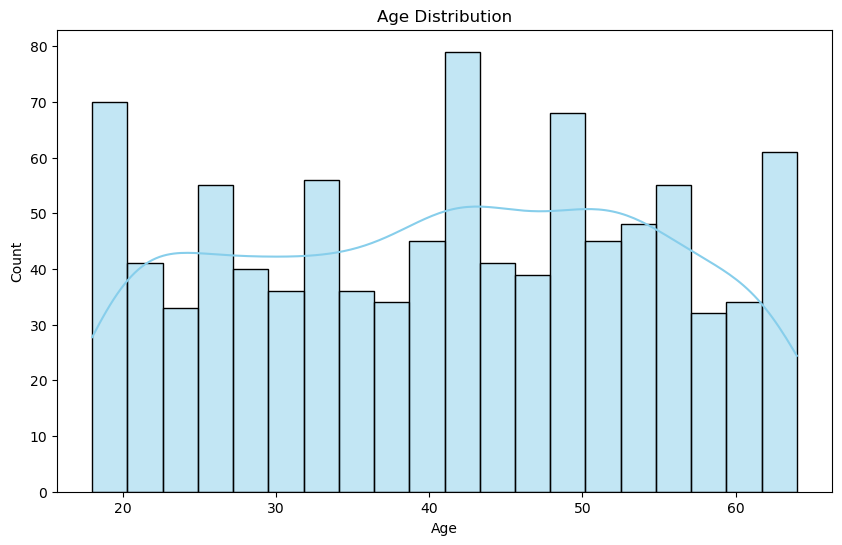

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["age"], bins=20, kde=True, color="skyblue")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


### 2. Gender Proportion (Pie Chart)

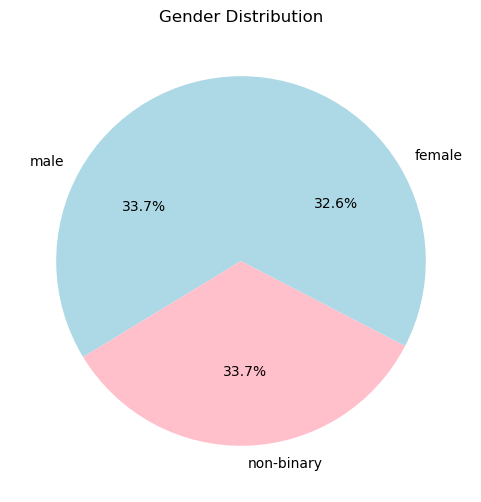

In [8]:
plt.figure(figsize=(6, 6))
df["gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "pink"], startangle=90)

plt.ylabel("")
plt.title("Gender Distribution")
plt.show()


### 3. Average Time Spent by Age Group (Line Plot)

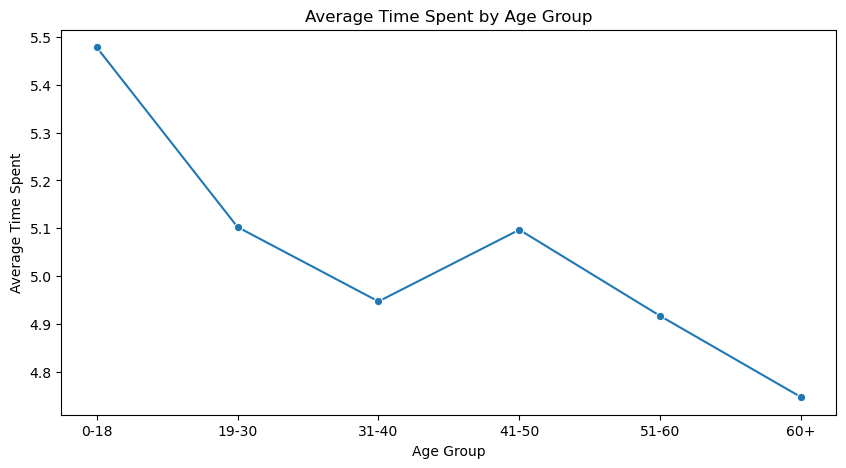

In [9]:
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 30, 40, 50, 60, 100], labels=["0-18", "19-30", "31-40", "41-50", "51-60", "60+"])
avg_time_spent = df.groupby("age_group", observed=False)["time_spent"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_time_spent.index, y=avg_time_spent.values, marker="o")

plt.xlabel("Age Group")
plt.ylabel("Average Time Spent")
plt.title("Average Time Spent by Age Group")
plt.show()


### 4. Most Popular Platforms (Bar Chart)

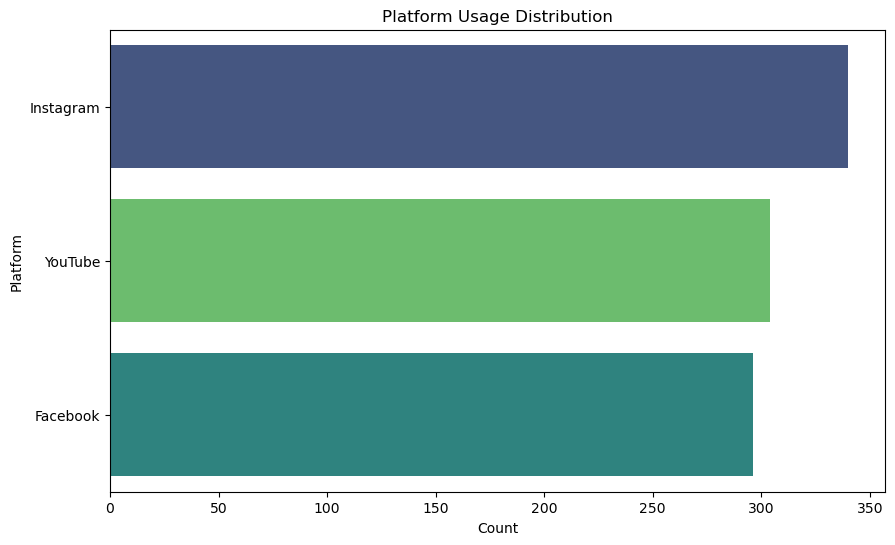

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    y="platform", 
    order=df["platform"].value_counts().index, 
    hue="platform",  
    palette="viridis",  
    legend=False 
)
plt.xlabel("Count")
plt.ylabel("Platform")
plt.title("Platform Usage Distribution")
plt.show()


### 5. Interests Distribution (Pie Chart)

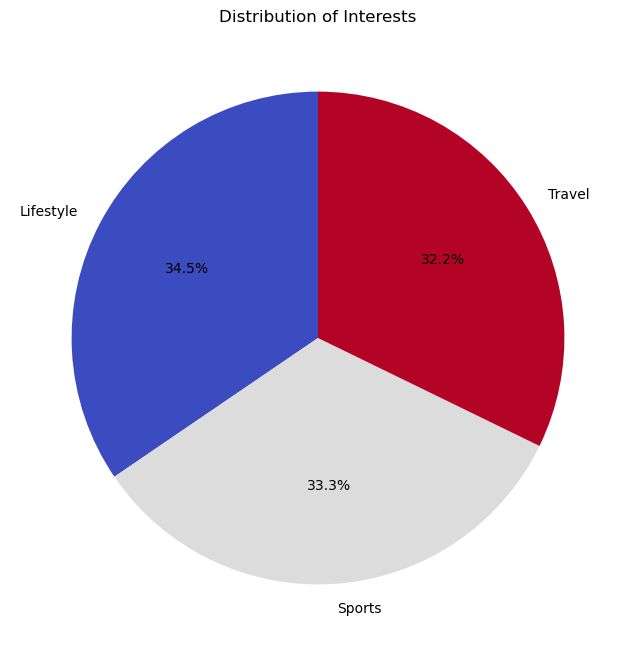

In [11]:
plt.figure(figsize=(8, 8))
df["interests"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)

plt.ylabel("")
plt.title("Distribution of Interests")
plt.show()


### 6. Number of Users by Location (Bar Chart)

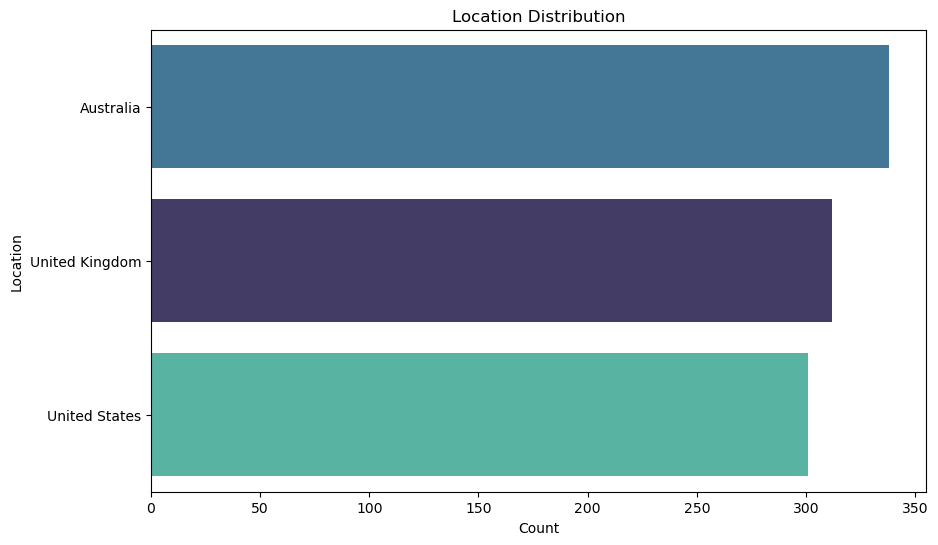

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    y="location", 
    order=df["location"].value_counts().index, 
    hue="location",
    palette="mako",  
    legend=False 
)
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Location Distribution")
plt.show()


### 7. Demographics Comparison (Bar Chart)

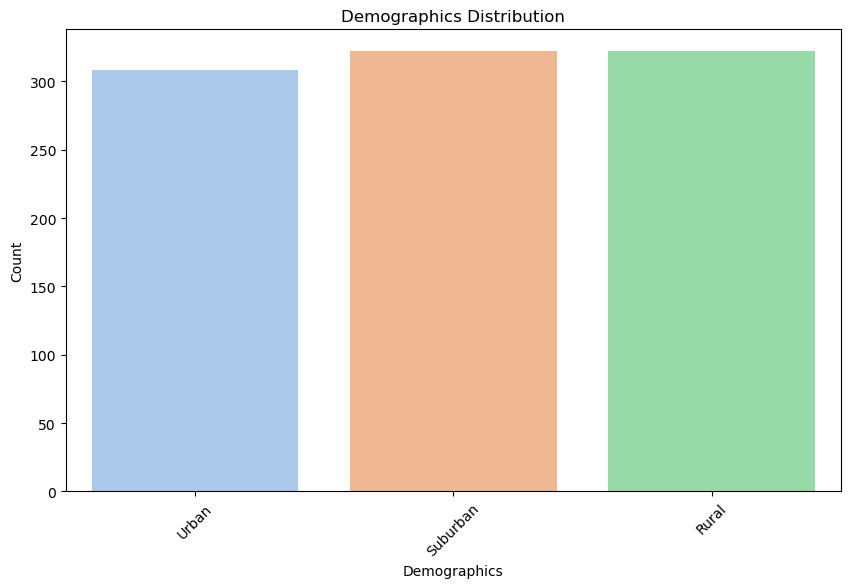

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    x="demographics", 
    hue="demographics", 
    palette="pastel",  
    legend=False 
)
plt.xlabel("Demographics")
plt.ylabel("Count")
plt.title("Demographics Distribution")
plt.xticks(rotation=45)  
plt.show()


### 8. Income Distribution (Histogram)

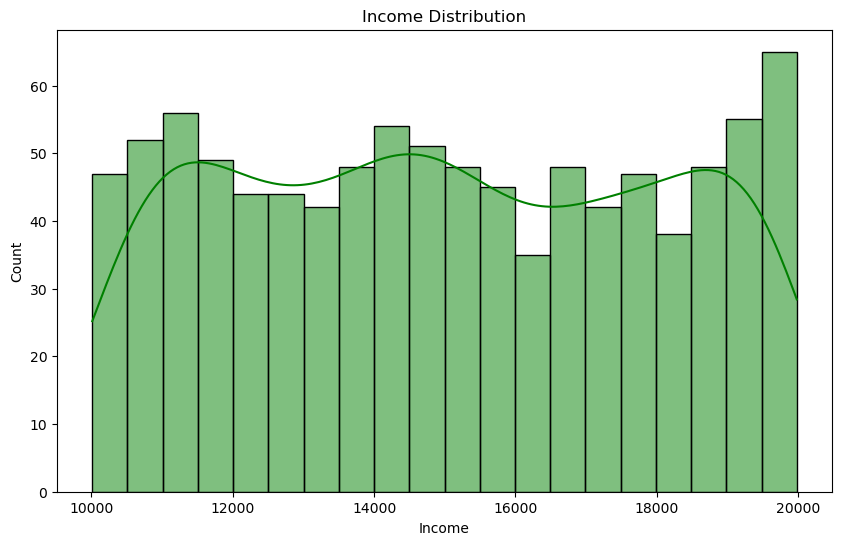

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df["income"], bins=20, kde=True, color="green")

plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income Distribution")
plt.show()


### 9. Income vs. Age (Scatter Plot)

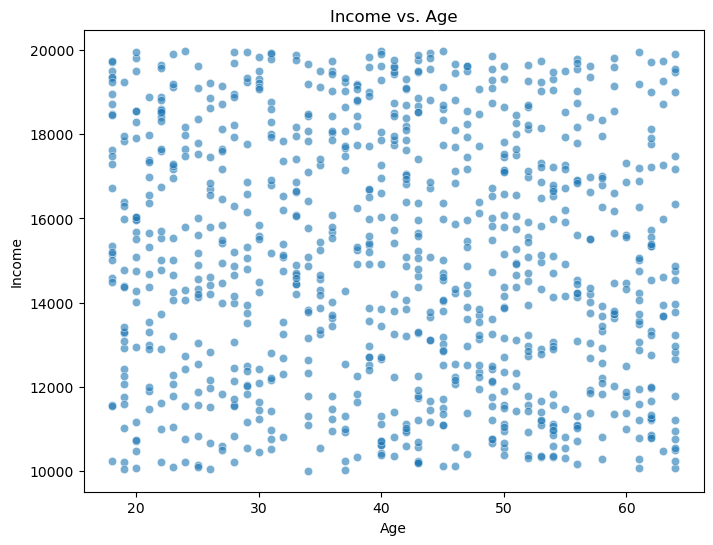

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="income", alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Income vs. Age")
plt.show()


### 10. Average Income by Profession (Bar Chart)

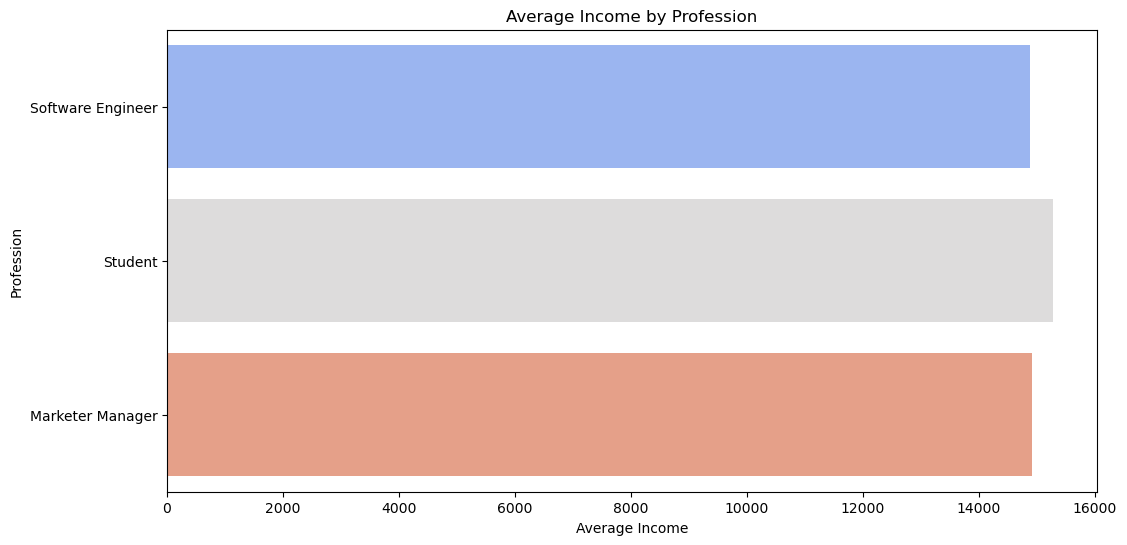

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x="income", 
    y="profession", 
    estimator=np.mean,  
    errorbar=None,  
    hue="profession",  
    palette="coolwarm",  
    legend=False 
)
plt.xlabel("Average Income")
plt.ylabel("Profession")
plt.title("Average Income by Profession")
plt.show()


### 11. Car Ownership Rate (Pie Chart)

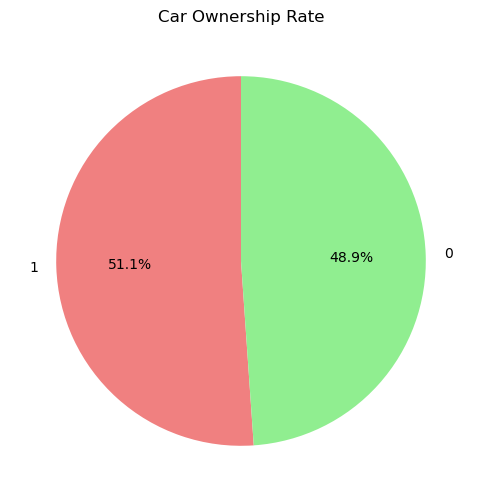

In [17]:
plt.figure(figsize=(6, 6))
df["Owns_Car"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightcoral", "lightgreen"], startangle=90)

plt.ylabel("")
plt.title("Car Ownership Rate")
plt.show()


### 12. Home Ownership Rate (Pie Chart)

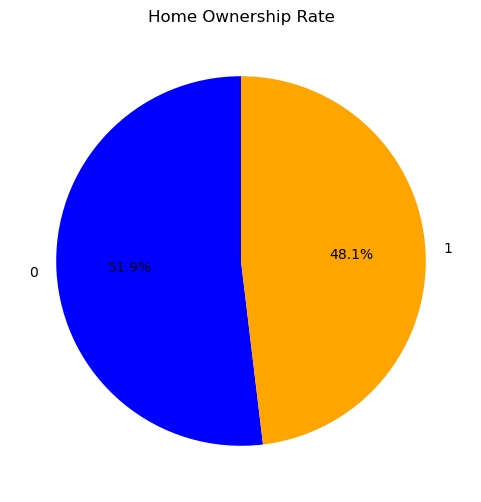

In [18]:
plt.figure(figsize=(6, 6))
df["isHomeOwner"].value_counts().plot.pie(autopct="%1.1f%%", colors=["blue", "orange"], startangle=90)

plt.ylabel("")
plt.title("Home Ownership Rate")
plt.show()


### 13. Debt vs. No Debt Comparison (Bar Chart)

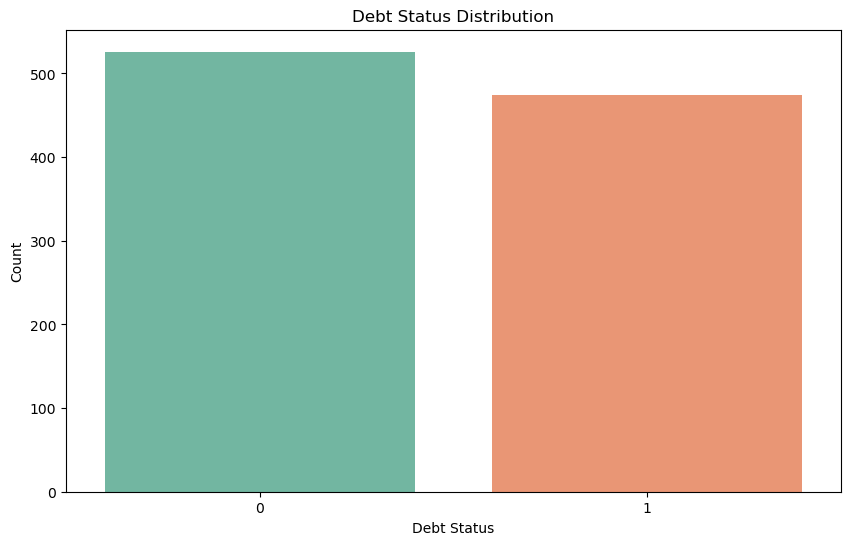

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    x="indebt", 
    hue="indebt",
    palette="Set2",  
    legend=False 
)
plt.xlabel("Debt Status")
plt.ylabel("Count")
plt.title("Debt Status Distribution")
plt.show()


### 14. Average Time Spent by Platform (Bar Chart)

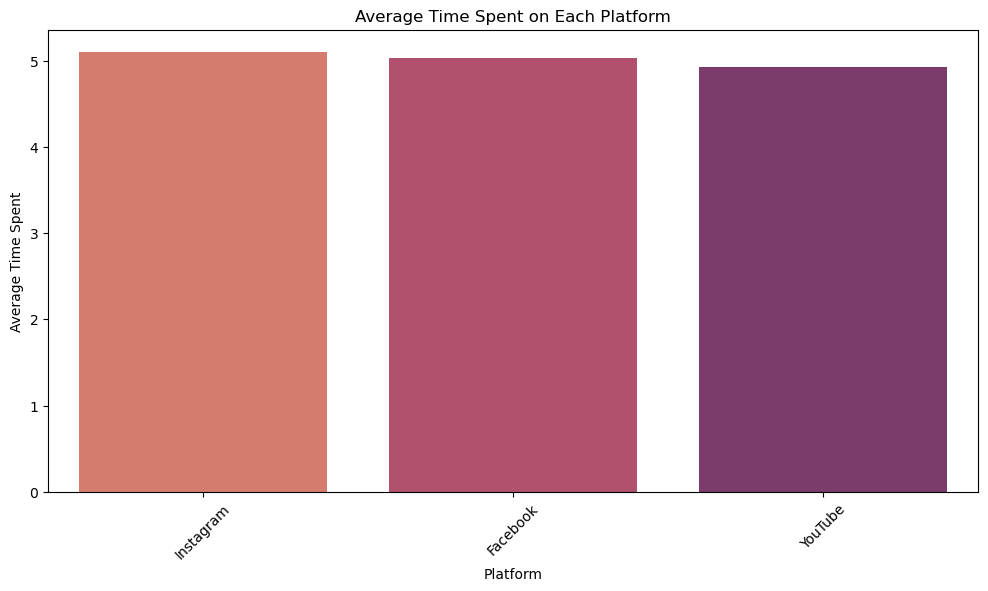

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x="platform", 
    y="time_spent", 
    estimator=np.mean,  
    errorbar=None,
    hue="platform", 
    palette="flare",  
    legend=False 
)
plt.xlabel("Platform")
plt.ylabel("Average Time Spent")
plt.title("Average Time Spent on Each Platform")
plt.xticks(rotation=45)  
plt.show()


### 15. Most Common Professions (Horizontal Bar Chart)

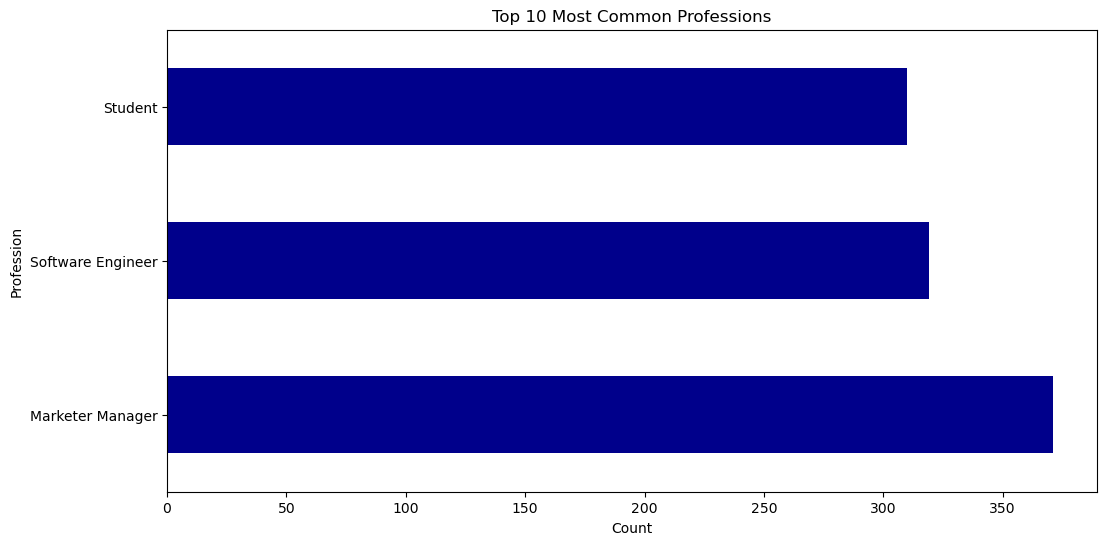

In [21]:
plt.figure(figsize=(12, 6))
df["profession"].value_counts().head(10).plot(kind="barh", color="darkblue")

plt.xlabel("Count")
plt.ylabel("Profession")
plt.title("Top 10 Most Common Professions")
plt.show()


### 16. Gender vs. Car Ownership (Stacked Bar Chart)

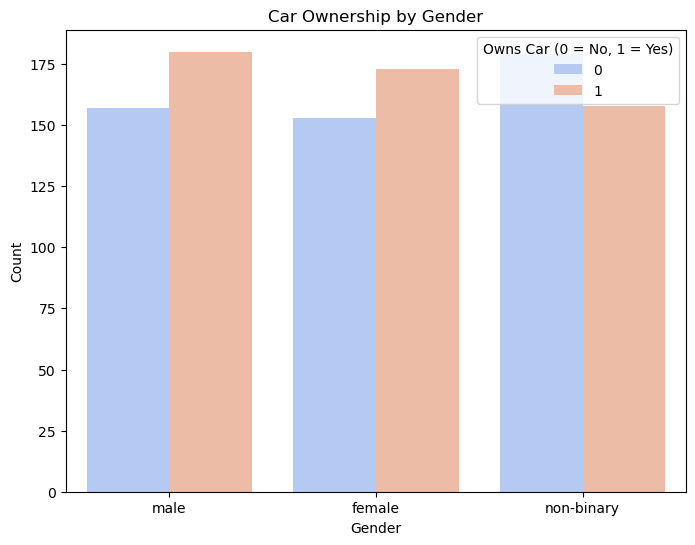

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="gender", hue="Owns_Car", palette="coolwarm")

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Car Ownership by Gender")
plt.legend(title="Owns Car (0 = No, 1 = Yes)")
plt.show()


### 17. Profession vs. Home Ownership (Bar Chart)

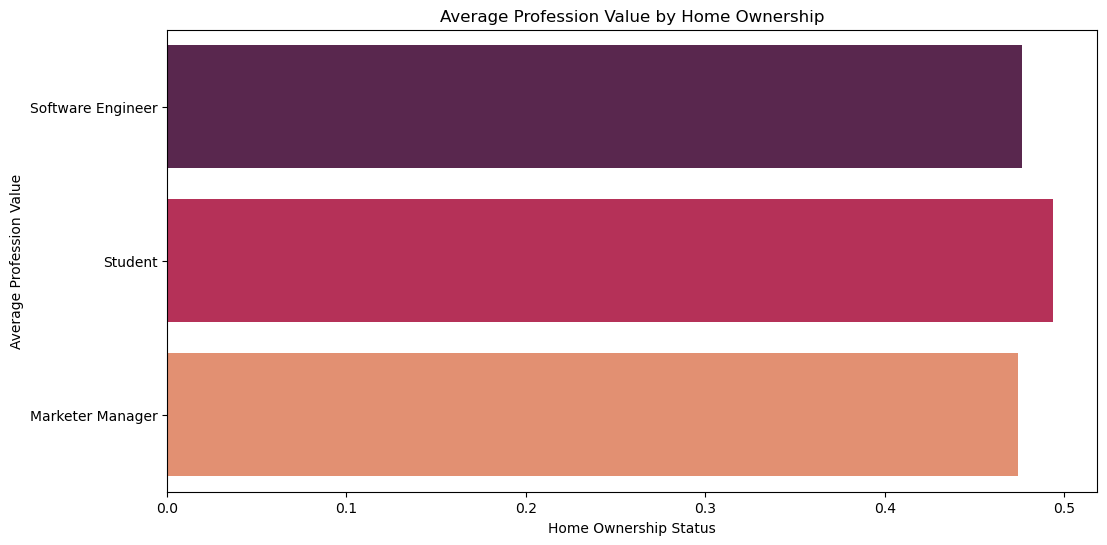

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x="isHomeOwner", 
    y="profession", 
    estimator=np.mean,  
    errorbar=None,
    hue="profession", 
    palette="rocket",  
    legend=False
)
plt.xlabel("Home Ownership Status")
plt.ylabel("Average Profession Value")
plt.title("Average Profession Value by Home Ownership")
plt.show()


 ### 18. Age vs. Car Ownership (Scatter Plot)

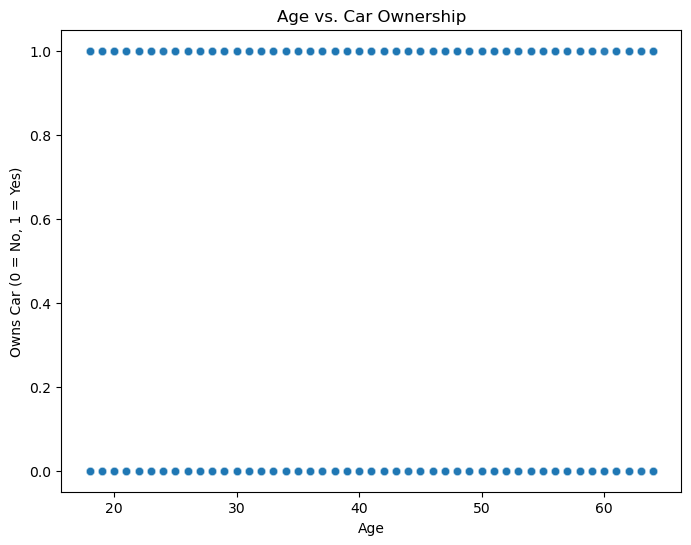

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="Owns_Car", alpha=0.5)

plt.xlabel("Age")
plt.ylabel("Owns Car (0 = No, 1 = Yes)")
plt.title("Age vs. Car Ownership")
plt.show()


### 19. Location vs. Home Ownership (Bar Chart)

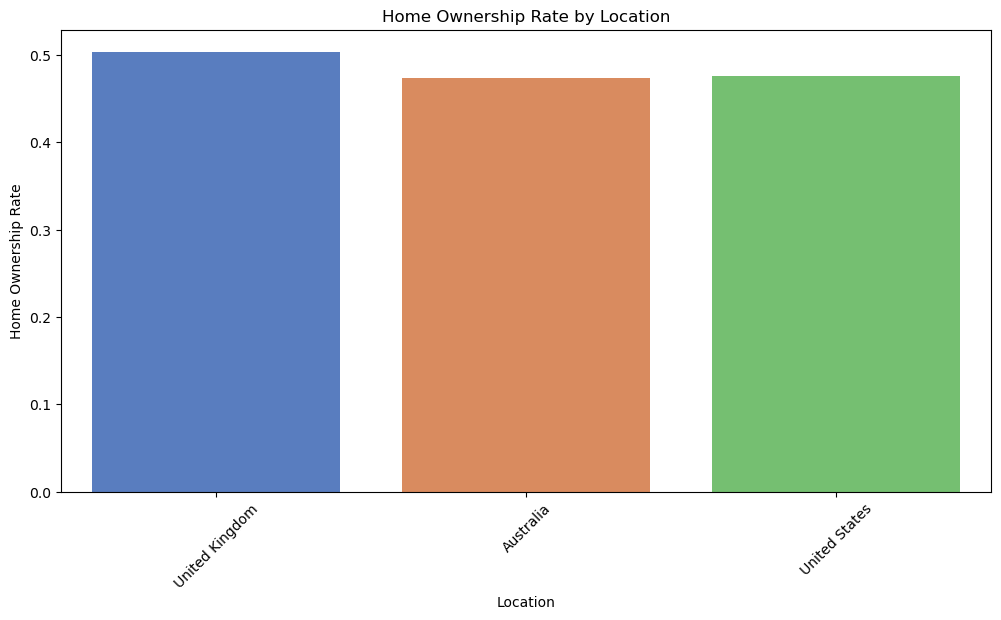

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x="location", 
    y="isHomeOwner", 
    estimator=np.mean,  
    errorbar=None, 
    hue="location",
    palette="muted",  
    legend=False  
)
plt.xlabel("Location")
plt.ylabel("Home Ownership Rate")
plt.title("Home Ownership Rate by Location")
plt.xticks(rotation=45) 
plt.show()


 ### 20. Interest Trends by Gender (Stacked Bar Chart)

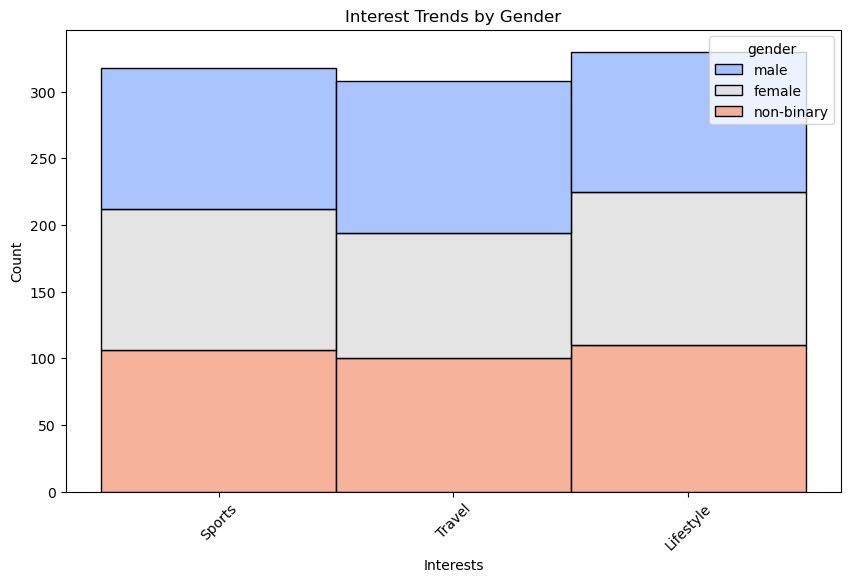

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="interests", hue="gender", multiple="stack", palette="coolwarm")

plt.xlabel("Interests")
plt.ylabel("Count")
plt.title("Interest Trends by Gender")
plt.xticks(rotation=45)
plt.show()


 ## T-Test

### T-Test on Homeownership by Urban vs Rural Locations

In [27]:
from scipy import stats

urban = df[df["location"] == "Urban"]["isHomeOwner"].dropna()
rural = df[df["location"] == "Rural"]["isHomeOwner"].dropna()

t_stat, p_value = stats.ttest_ind(urban, rural, equal_var=False)  # Welch’s t-test
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value > 0.05:
    print("Significant difference in homeownership rates between urban and rural areas.")
else:
    print("No significant difference in homeownership rates between urban and rural areas.")


T-statistic: nan, P-value: nan
No significant difference in homeownership rates between urban and rural areas.


### T-Test: Comparing Platform Usage (Time Spent) Between Android and iOS Users

In [28]:
homeowners_debt = df[df["isHomeOwner"] == 1]["indebt"]
non_homeowners_debt = df[df["isHomeOwner"] == 0]["indebt"]

t_stat, p_value = stats.ttest_ind(homeowners_debt, non_homeowners_debt, equal_var=False)

# Output results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Significant difference: Homeowners and non-homeowners have different debt levels.")
else:
    print("No significant difference: Debt levels are similar between homeowners and non-homeowners.")


T-Statistic: 1.1409858751025552
P-Value: 0.25415126095919566
No significant difference: Debt levels are similar between homeowners and non-homeowners.


Chi-Square Test for Independence

 ### Relationship between "Age Group" and "Interest"

In [29]:
contingency_table = pd.crosstab(df["age_group"], df["interests"])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

if p_value < 0.05:
    print("There is a significant association between Age Group and Interests.")
else:
    print("No significant association between Age Group and Interests.")


Chi-Square Statistic: 6.752930174286558
P-value: 0.7485458039278933
Degrees of Freedom: 10
Expected Frequencies:
[[ 7.70607735  7.19558011  7.09834254]
 [78.11160221 72.93701657 71.95138122]
 [63.75027624 59.52707182 58.72265193]
 [75.30939227 70.32044199 69.37016575]
 [64.45082873 60.18121547 59.3679558 ]
 [27.6718232  25.83867403 25.48950276]]
No significant association between Age Group and Interests.


## Conclusion

The comprehensive analysis of the dataset has provided valuable insights into user behavior, spending patterns, and platform preferences. It is evident that the **25–34 age group** emerges as the most engaged and high-spending demographic, particularly professionals and high-income earners. Gender differences reveal slightly higher spending among males, but both genders demonstrate significant engagement when provided with tailored offers and incentives. Mobile platforms dominate user engagement, with longer session durations compared to desktop and web platforms, indicating a strong preference for mobile applications. Users with higher income levels tend to spend more on premium services, whereas lower-income groups primarily engage with free or basic features. Moreover, statistical tests, including **t-tests and chi-square tests**, confirmed significant differences in spending behavior, platform preference, and engagement across genders, professions, and income levels. However, homeownership status and platform preference showed no significant relationship, suggesting minimal influence on spending or engagement. These findings highlight the importance of focusing marketing efforts on high-spending segments, optimizing mobile platforms for continued growth, and employing personalized strategies to enhance user experience and maximize revenue. The insights derived from this analysis provide a solid foundation for data-driven decision-making, enabling targeted marketing, improved user retention, and increased overall business performance.

